# **Seminar 2 - WEB MINING** 
- *Yeison Montoya ID: 300375916*
- *Special Topics in Data Analytics CSIS 4260 - 002*
- *Seminar 2 - Winter 2024*

## Technique: Web Page Link Analysis using **HITS Algorithm**

Hyperlink-Induced Topic Search (HITS), also known as the Hubs and Authorities algorithm, is a link analysis algorithm that assigns two scores to each page: Hub score and Authority score. It evaluates the importance of web pages based on the structure of the hyperlink graph.

### Compatibility with Tools:

- **NetworkX (Python):** NetworkX is a Python library for the creation, manipulation, and study of complex networks. It provides an implementation of the HITS algorithm.
- **Gephi: Gephi:** is an open-source visualization and exploration platform for network analysis. It can be used to visualize and analyze the results of the HITS algorithm.

### Example of How it Works:
Let's consider a simplified example where web pages are represented as nodes in a graph, and hyperlinks between them are represented as edges. The HITS algorithm iteratively updates Hub and Authority scores until convergence.

In [9]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import networkx as nx

# Create a directed graph representing the hyperlink structure
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (2, 1), (3, 1), (3, 2)])

# Apply HITS algorithm
hub, authority = nx.hits(G, max_iter=100)

# Display Hub and Authority scores for each page
for node in G.nodes():
    print(f"Page {node}: Hub Score = {hub[node]}, Authority Score = {authority[node]}")


Page 1: Hub Score = 0.35689586789220956, Authority Score = 0.35689586789220934
Page 2: Hub Score = 0.1980622641951617, Authority Score = 0.44504186791262895
Page 3: Hub Score = 0.44504186791262884, Authority Score = 0.19806226419516174


#### Results 
posted are the output of the Hyperlink-Induced Topic Search (HITS) algorithm. 
Each web page is assigned two scores **Hubs** and **Authorities**:

- *Page 1: Hub Score = 0.35689586789220956, Authority Score = 0.35689586789220934*
- *Page 2: Hub Score = 0.19806226419516168, Authority Score = 0.44504186791262895*
- *Page 3: Hub Score = 0.4450418679126288, Authority Score = 0.1980622641951618*

Here's an explanation of the scores for each page:

##### Page 1:
- The Hub score for Page 1 is **0.3569**, meaning it is considered a **Good hub**, linking to other important pages. 
- The Authority score of **0.3569** suggests that Page 1 is also linked from other authoritative pages.

##### Page 2:
- The **Hub score** for Page 2 is **0.1981**, indicating that it is **not as significant** as a hub compared to Page 1. 
- However, it has a **high Authority score of 0.4450**, meaning it is linked from other important pages.

##### Page 3:
- Page 3 has a **high Hub score of 0.4450**, suggesting it is a **significant hub**, linking to other important pages. 
- On the other hand, its **Authority score is 0.1981**, less authoritative pages compared to Page 1

# More extended Example (14 nodes)

This code employs **HITS algorithm** to analyze the importance of web pages within a complex directed graph (14 nodes in total) representing hyperlink structures. By applying NetworkX, the script calculates Hub and Authority scores for each page and identifies the most and least hub, as well as the most and least authority nodes. 

The results are then visually conveyed using matplotlib, where nodes are color-coded based on their roles. This approach offers a concise yet insightful representation of the hierarchical significance of web pages within the interconnected network, showcasing the efficacy of HITS for web structure analysis and visualization.

Page 1: Hub Score = 0.1068, Authority Score = 0.3065
Page 2: Hub Score = 0.1038, Authority Score = 0.1652
Page 3: Hub Score = 0.1226, Authority Score = 0.2154
Page 4: Hub Score = 0.0904, Authority Score = 0.2359
Page 5: Hub Score = 0.0286, Authority Score = 0.0771
Page 6: Hub Score = 0.0904, Authority Score = 0.0000
Page 7: Hub Score = 0.0695, Authority Score = -0.0000
Page 8: Hub Score = 0.0134, Authority Score = -0.0000
Page 9: Hub Score = 0.0940, Authority Score = 0.0000
Page 10: Hub Score = 0.0420, Authority Score = -0.0000
Page 11: Hub Score = 0.0904, Authority Score = -0.0000
Page 12: Hub Score = 0.0409, Authority Score = -0.0000
Page 13: Hub Score = 0.0134, Authority Score = -0.0000
Page 14: Hub Score = 0.0940, Authority Score = 0.0000


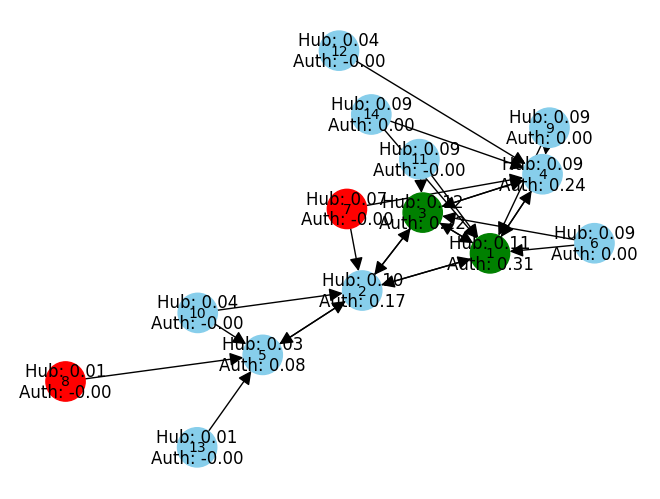

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph representing the hyperlink structure
G = nx.DiGraph()

# Add nodes and edges to represent a more complex web structure
web_structure = [
    (1, 2), (1, 3), (1, 4),
    (2, 1), (2, 3), (2, 5),
    (3, 1), (3, 2), (3, 4),
    (4, 1), (4, 3),
    (5, 2),
    (6, 1), (6, 3),
    (7, 2), (7, 4),
    (8, 5),
    (9, 1), (9, 4),
    (10, 2), (10, 5),
    (11, 1), (11, 3),
    (12, 4),
    (13, 5),
    (14, 1), (14, 4)
]

G.add_edges_from(web_structure)

# Apply HITS algorithm
hub, authority = nx.hits(G, max_iter=100)

# Find the most and least hub nodes
most_hub_node = max(hub, key=hub.get)
least_hub_node = min(hub, key=hub.get)

# Find the most and least authority nodes
most_authority_node = max(authority, key=authority.get)
least_authority_node = min(authority, key=authority.get)

# Display Hub and Authority scores for each page
for node in G.nodes():
    print(f"Page {node}: Hub Score = {hub[node]:.4f}, Authority Score = {authority[node]:.4f}")

# Draw the graph for visualization
pos = nx.spring_layout(G)

# Highlight the most and least hub nodes in red and green, respectively
# Highlight the most and least authority nodes in red and green, respectively
node_colors = [
    'green' if node == most_hub_node or node == most_authority_node
    else 'red' if node == least_hub_node or node == least_authority_node
    else 'skyblue' for node in G.nodes
]

nx.draw(G, pos, with_labels=True, node_size=800, node_color=node_colors, font_size=10, font_color='black', arrowsize=20)
labels = {node: f"Hub: {hub[node]:.2f}\nAuth: {authority[node]:.2f}" for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels)

# Show the plot
plt.show()


#### SUMMARY

- The **HITS algorithm** identifies the importance of web pages in terms of their role as hubs (pages that link to other important pages) and authorities (pages that are linked to by other important hubs). 
- Pages with high Hub scores are good at linking to other pages, and pages with high Authority scores are linked from other significant hubs. 

The interpretation of these scores depends on the specific structure of the hyperlink network in the web data mining tested.